(ann:turtledot)=
# Tortue et graphes

Mis à jour : {sub-ref}`today`, lecture : {sub-ref}`wordcount-minutes`
minutes minimum, PhL.

### A venir

1. Autres algorithmes récursifs importants
    - recherche séquentielle et dichotomique : voir chapitre "Rechercher"    
    - trier : tri fusion, tri rapide : voir chapitre "Trier"  
2. Etablir la complexité d'algos récursifs
    - La fonction de complexité est une suite récursive : la complexité de la résolution récursive d'un problème de taille n est fonction de la complexité de la résolution (récursive) du problème de taille réduite.
    - exemple : $C(n) = 2 \times C(n/2) + 1$ et $C(1) = 1$
    - autre exemple : $C(n) = p \times C(n/p) + f(p)$ et $C(1) = 1$
    - ...
    - est traité en dernière partie du chapitre "Complexités"  
3. Prouver la terminaison et la correction de ces algos récursifs
    - est traité dans le chapitre "Prouver"  
4. Dé-récursifier : récursif -> itératif (quand on peut)
    - voir les slides du cours de 2016 : http://perso.univ-perp.fr/langlois/images/pdf/ens/L1/s7-sl4.pdf 

(ann:traceVK)=
## Pour tracer des segments de Von Koch avec turtle !

Turtle utilise un affichage dans une fenêtre extérieure via tcl-tk.  
Il est possible que cet affichage cohabite mal avec le notebook jupyter.  
Il est préférable d'exécuter ces séquences de code python hors du notebook (idle, terminal, ...).  

In [30]:
import turtle as t
#help(t)

```python
"""Turtle : mouvements elementaires"""

# init : taille ecran en pixels, clear ecran, reset des variablesm
t.screensize(500,500)
t.reset()
t.hideturtle() # pour aller plus vite
t.degrees() # angles en deg
```

```python
'''Utilise le module turtle 
Ouvre une fenêtre 
et trace 3 segments de VK
'''

def segment(d, n, color="black"):
    """segment de von Koch
    recursion sur n pour decouper le segment de longueur d et
    tracer d (longueur du segment) pixels si n==0"""
    t.pencolor(color)        

    if n==0:
        t.forward(d)
    else:
        dsur3 = d//3
        segment(dsur3, n-1)
        t.left(60)
        segment(dsur3, n-1)
        t.right(120)
        segment(dsur3, n-1)
        t.left(60)
        segment(dsur3, n-1)

# init        
t.screensize(500,500)
t.reset()
t.hideturtle() # pour aller plus vite
t.degrees() # angles en deg

# taille
d = 300
#nbiter = input("nombre d'iterations = ")
nbiter = 1
h = 150 # espace vertical entre 2 traces

# point de depart
a = (-200, 400)

# trace et changement point de depart
for i in range(nbiter):
    # deplacement au point de depart
    t.up()
    t.goto(a)
    t.down()

    # trace 
    segment(d, i)
    
    # maj point de depart
    a = (a[0], a[1] - h)

# pour attendre avant d'effacer la fenetre turtle
v = input("OK ?")
t.reset()

# pour que le trace reste a l ecran
t. mainloop()
```

```python
'''trace (nbiter) flocons de VK'''
def flocon(d, n, color="black"):
    ''' trace flocon de VK en utilisant segment'''
    segment(d, n, color)
    t.right(120)
    segment(d, n, color)
    t.right(120)
    segment(d, n, color)
    t.right(120)

#nbiter = input("nombre d'iterations = ")
nbiter = 3
h = 150 # espace vertical entre 2 traces
a = (-200, 200) # point de depart
d = 84  # taille

# trace et changement point de depart
for i in range(nbiter):
    # deplacement au point de depart
    t.up()
    t.goto(a)
    t.down()

    # trace 
    flocon(d, i)
    
    # maj point de depart
    a = (a[0], a[1] - h)

# pour attendre avant d'effacer la fenetre turtle
v = input("OK ?")
t.reset()
 ```  

(ann:graphviz)=
### Pour tracer des graphes

Un arbre est un graphe.
Commençons avec une première construction simple de l'arbre des appels de `fact(4)`.

In [31]:
import graphviz as gvz
import functools

#help(gvz)

In [32]:
''' arbre des appels du calcul de fact(4) : construction simple'''
fact4 = gvz.Digraph(format='jpg')
fact4.node('f4', label='fact(4)')
fact4.node('f3', label='fact(3)')
fact4.node('f2', label='fact(2)')
fact4.node('f1', label='fact(1)', color='red')
fact4.edge('f4', 'f3')
fact4.edge('f3', 'f2')
fact4.edge('f2', 'f1')

file_out = fact4.render('fig/fact4_dot')

Affichage arbre construit avec le code précédent


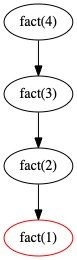

In [33]:
'''Affichage arbre construit avec le code précédent'''
from IPython.display import display, Image
print(__doc__)
display(Image('fig/fact4_dot.jpg'))

Arbre des appels du calcul de fact(4) : construction plus complète

In [34]:
''' arbre des appels du calcul de fact(4) : construction plus complète'''

digraph = functools.partial(gvz.Digraph, format='jpg')

def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

''' arbre complet de l'évaluation fact(4)'''
fact4_complet = add_edges(
    add_nodes(digraph(), [
        ('4'), ('3'), ('2'),
        ('f4', {'label': 'fact(4)'}),
        ('f3', {'label': 'fact(3)'}),
        ('f2', {'label': 'fact(2)'}),
        ('f1', {'label': 'fact(1)', 'color':'red'}),
    ]),
    [
        ('f4', '4'),
        ('f3', '3'),
        ('f2', '2'),
        ('f4', 'f3'),
        ('f3', 'f2'),
        ('f2', 'f1')
    ]
).render('fig/fact4_complet')

Affichage arbre


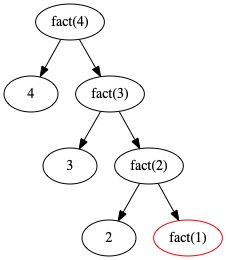

In [35]:
'''Affichage arbre'''
from IPython.display import display, Image
print(__doc__)
display(Image('fig/fact4_complet.jpg'))